<a href="https://colab.research.google.com/github/Lorenzopiloto/Statistics-DS/blob/main/Pr%C3%A1tica_Distribui%C3%A7%C3%B5es_Discretas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práticas Distribuições Discretas

## Carregar Módulos

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson

## Carregar Dados

In [2]:
dados = pd.read_csv('acidentes.csv')

In [3]:
dados.head()

,id_acidente,data_acidente,tipo_lesao,risco_classificacao
0,1,2014-02-11,Laceração,Leve
1,2,2014-02-05,Ferimentos Perfurantes,Médio
2,3,2014-01-31,Contusão,Leve
3,4,2014-01-13,Corte,Leve
4,5,2014-02-14,Contusão,Médio


## Exemplo Histograma

- Preparar os Dados

In [4]:
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

In [5]:
dados['data_acidente_mensal'] = dados['data_acidente'].dt.strftime('%Y-%m')

In [6]:
dados_acidentes_mensal = dados.groupby('data_acidente_mensal') \
                              .size() \
                              .to_frame('n') \
                              .reset_index()

In [7]:
dados_acidentes_mensal.head()

,data_acidente_mensal,n
0,2013-07,1
1,2014-01,15
2,2014-02,12
3,2014-03,11
4,2014-04,10


- Exemplo matplotlib

Text(0, 0.5, 'Frequencia')

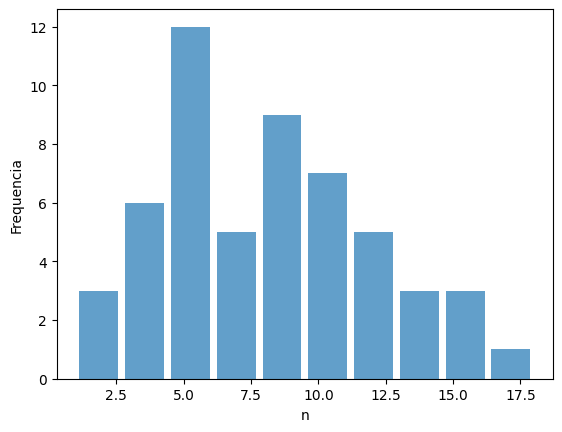

In [8]:
plt.hist(dados_acidentes_mensal['n'], alpha=0.7, rwidth=0.85)
plt.xlabel('n')
plt.ylabel('Frequencia')

- Exemplo Seaborn

Text(0.6944444444444446, 0.5, 'Frequencia')

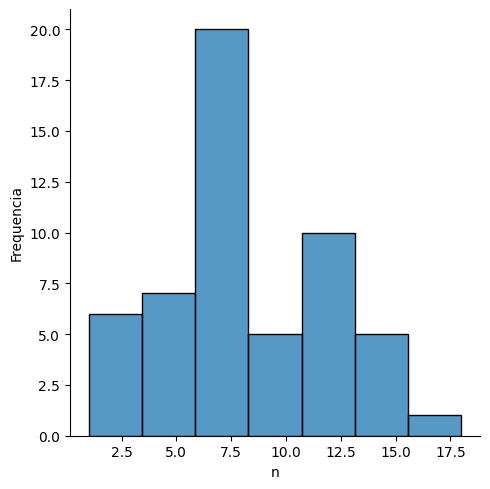

In [9]:
sns.displot(dados_acidentes_mensal['n'])
plt.ylabel('Frequencia')

## Exemplos Simulados

### Distribuição Uniforme

In [10]:
n = 6
p = 1/n

In [11]:
resultados = np.arange(1, 7)

In [12]:
probabilidade = np.repeat(p, n)

In [13]:
dados_uniforme = pd.DataFrame(resultados, columns=['resultados'])
dados_uniforme['probabilidade'] = probabilidade

<Axes: xlabel='resultados'>

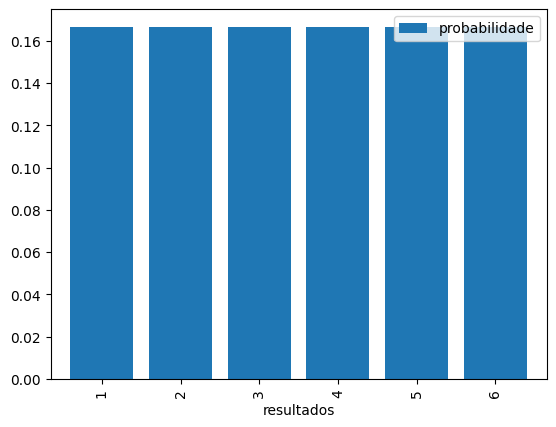

In [14]:
dados_uniforme.plot(kind = 'bar',
                    x = 'resultados',
                    y = 'probabilidade', width = 0.8)

## Distribuição Bernoulli

In [15]:
p = 0.2

In [16]:
resultados = np.arange(0, 2)

In [17]:
probabilidade = np.array([p, 1-p])

In [18]:
dados_bernoulli = pd.DataFrame(resultados, columns=['resultados'])
dados_bernoulli['probabilidade'] = probabilidade

<Axes: xlabel='resultados'>

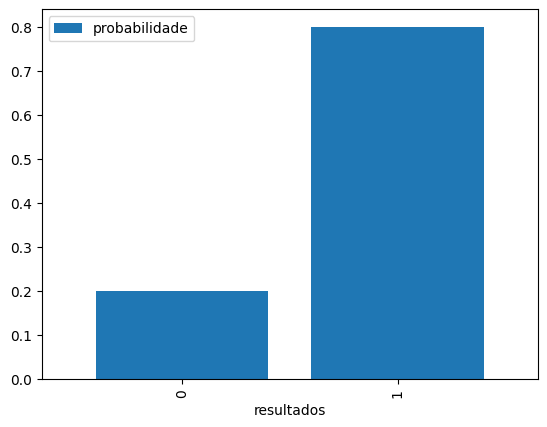

In [19]:
dados_bernoulli.plot(kind = 'bar',
                     x = 'resultados',
                     y = 'probabilidade', width = 0.8)

## Distribuição Binomial

In [20]:
n = 5
p = 0.8

In [21]:
n_sucessos = [i for i in range(n+1)]

In [22]:
dados_binomial = pd.DataFrame(n_sucessos, columns=['n_sucessos'])

In [23]:
dados_binomial['probs'] = dados_binomial['n_sucessos'].apply(lambda x: binom.pmf(k=x, n = n, p = p))

<Axes: xlabel='n_sucessos'>

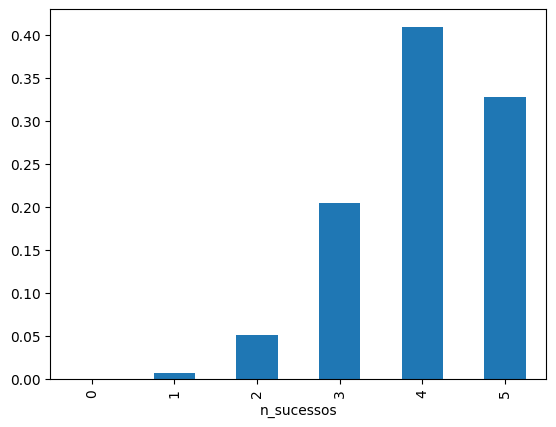

In [24]:
dados_binomial.plot(kind='bar',
                    x = 'n_sucessos',
                    y = 'probs',
                    legend = None)

## Distribuição Poisson

In [25]:
n = 15
mu = 2

In [26]:
resultados = [i for i in range(n+1)]

In [27]:
dados_poisson = pd.DataFrame(resultados, columns=['n_sucessos'])

In [28]:
dados_poisson['probs'] = dados_poisson['n_sucessos'].apply(lambda x: poisson.pmf(k=x, mu=mu))

<Axes: xlabel='n_sucessos'>

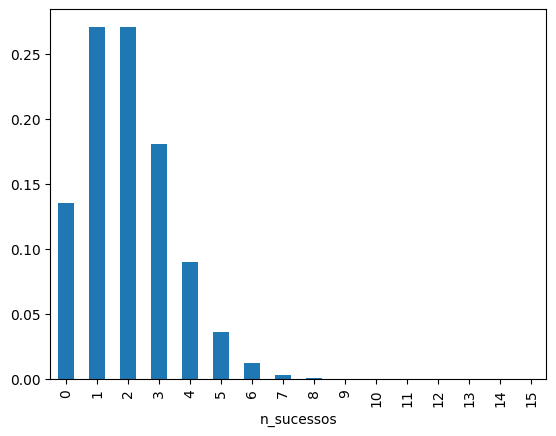

In [29]:
dados_poisson.plot(kind='bar',
                   x = 'n_sucessos',
                   y = 'probs',
                   legend = None)